In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# read iclr2017.jsin
df = pd.read_json('iclr_2017.json')
# drop na citation vales
df = df.dropna(subset=['citation'])

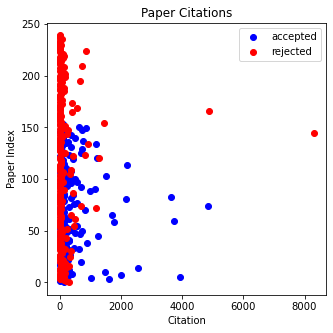

In [49]:
# scatter accepted and rejected paper citations

# accepted paper
accepted = df[df['accepted'] == True]
# rejected paper
rejected = df[df['accepted'] == False]

# plot,show the legend

plt.figure(figsize=(5, 5))
plt.xlabel('Citation')
plt.ylabel('Paper Index')
plt.title('Paper Citations')
plt.scatter(accepted['citation'],  np.arange(len(accepted)), label='accepted', color='b')
plt.scatter(rejected['citation'],  np.arange(len(rejected)), label='rejected', color='r')
plt.legend()

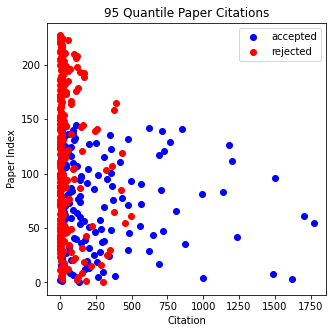

In [50]:
# drop the outlier citation papers with 5 percent for accepted and rejected papers
accepted_norm = accepted[accepted['citation'] < accepted['citation'].quantile(0.95)]
rejected_norm = rejected[rejected['citation'] < rejected['citation'].quantile(0.95)]


plt.figure(figsize=(5, 5))
plt.xlabel('Citation')
plt.ylabel('Paper Index')
plt.title('95 Quantile Paper Citations')
plt.scatter(accepted_norm['citation'],  np.arange(len(accepted_norm)), label='accepted', color='b')
plt.scatter(rejected_norm['citation'],  np.arange(len(rejected_norm)), label='rejected', color='r')
plt.legend()

In [51]:
accept_no = len(df[df.accepted == True])
reject_no = len(df[df.accepted == False])

print('Accepted papers: ', accept_no)
print('Rejected papers: ', reject_no)

Accepted papers:  154
Rejected papers:  240


In [55]:
# sum citations of accepted papers dropping the Nan citations and normalize with the number of accepted papers

len_cited_accept = len(df[df.accepted == True].citation)
len_cited_reject = len(df[df.accepted == False].citation)
per_cited_accept = sum(df[df.accepted == True].citation)/len_cited_accept
per_cited_reject = sum(df[df.accepted == False].citation)/len_cited_reject

print('Per paper citations of accepted papers: ',per_cited_accept)
print('Per paper  citations of rejected papers: ',per_cited_reject)


Per paper citations of accepted papers:  440.88961038961037
Per paper  citations of rejected papers:  142.3


In [47]:
accept_no

172

In [56]:
# calculate the average number of citations per paper for accepted and rejected papers for 95 quantile
len_cited_accept = len(accepted_norm)
len_cited_reject = len(rejected_norm)
normalized_cited_accept = sum(accepted_norm.citation)/len_cited_accept
normalized_cited_reject = sum(rejected_norm.citation)/len_cited_reject

print('Normalized per paper citations of accepted papers: ',normalized_cited_accept)
print('Normalized per paper citations of rejected papers: ',normalized_cited_reject)

Normalized per paper citations of accepted papers:  293.56164383561645
Normalized per paper citations of rejected papers:  52.14035087719298
